In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img_1_BGR = cv2.imread('tire_images//img_1.jpg')
img_1_gray = cv2.cvtColor(img_1_BGR,cv2.COLOR_BGR2GRAY)
img_1_RGB = cv2.cvtColor(img_1_BGR,cv2.COLOR_BGR2RGB)
# with equalhist
HSV_img_1 = cv2.cvtColor(img_1_BGR, cv2.COLOR_BGR2HSV)
HSV_img_1[:,:,2]  = cv2.equalizeHist(HSV_img_1[:,:,2])   # grabbing the value channel and equalize the histogram. and replace it back
HSV_img_1_eqhist = cv2.cvtColor(HSV_img_1, cv2.COLOR_HSV2BGR) # converting the back to RGB

In [3]:
def display_text_img(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

(2001, 1900, 3)

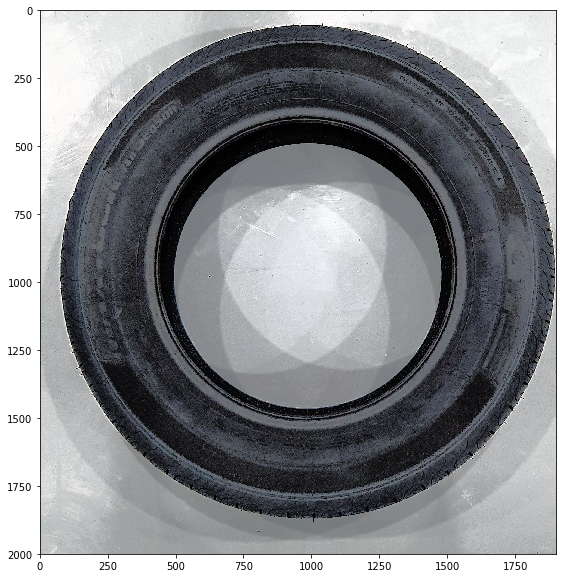

In [4]:
display_text_img(HSV_img_1_eqhist)
HSV_img_1_eqhist.shape

In [5]:
img_blur_watershed = cv2.medianBlur(HSV_img_1_eqhist,5)
img_grayscale_watershed = cv2.cvtColor(img_blur_watershed,cv2.COLOR_BGR2GRAY)
rep_img_watershed, img_binary_threshold_otsu_watershed = cv2.threshold(img_grayscale_watershed,90,255, cv2.THRESH_BINARY_INV+cv2.THRESH_TOZERO)
#adaptiveThreshold_gas = cv2.adaptiveThreshold(img_grayscale_watershed,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,55,13)

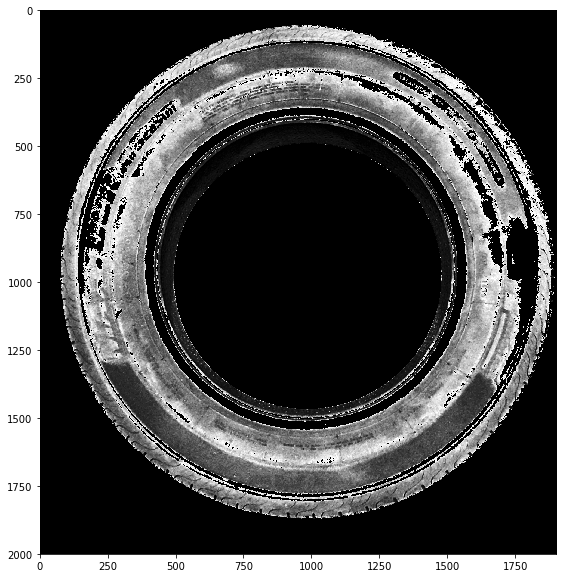

In [6]:
display_text_img(img_binary_threshold_otsu_watershed)

In [7]:
kernel_watershed = np.ones((7,7),np.uint8)
opening_watershed = cv2.morphologyEx(img_binary_threshold_otsu_watershed,cv2.MORPH_CLOSE,kernel_watershed,3)

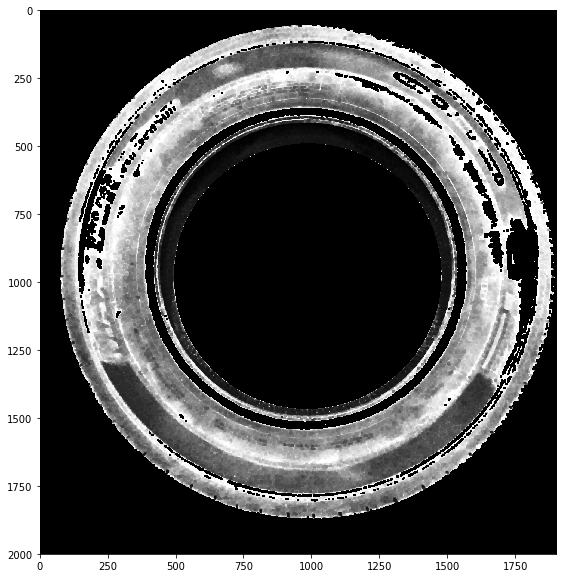

In [8]:
display_text_img(opening_watershed)

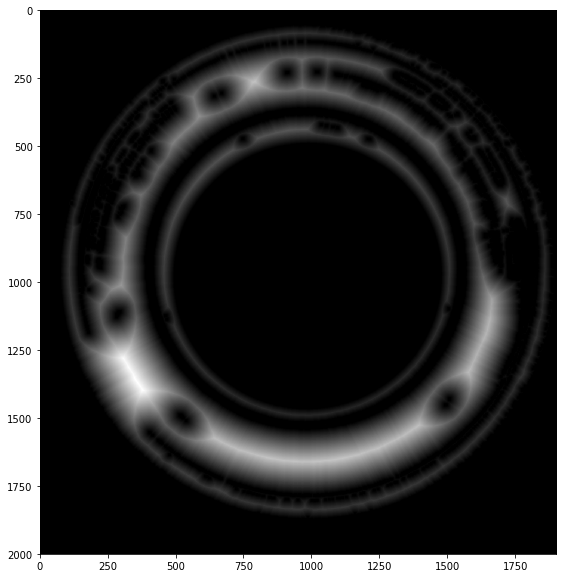

In [9]:
distance_transform = cv2.distanceTransform(opening_watershed, cv2.DIST_L2,5)
display_text_img(distance_transform)



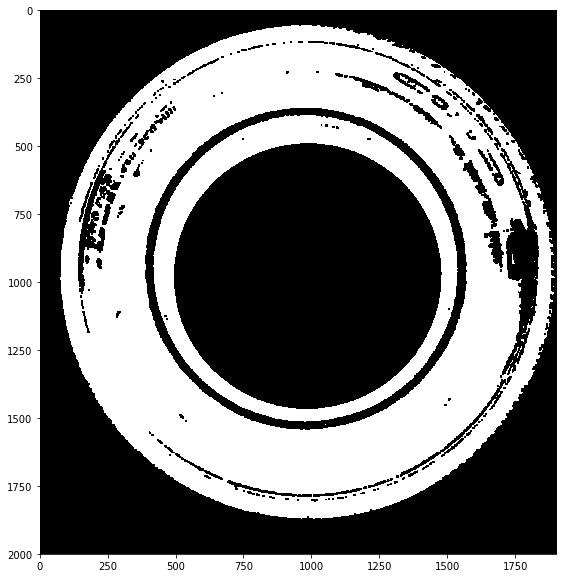

In [10]:
ret_fore, sure_fg = cv2.threshold(distance_transform,0.0012*distance_transform.max(), 255,0)
display_text_img(sure_fg)

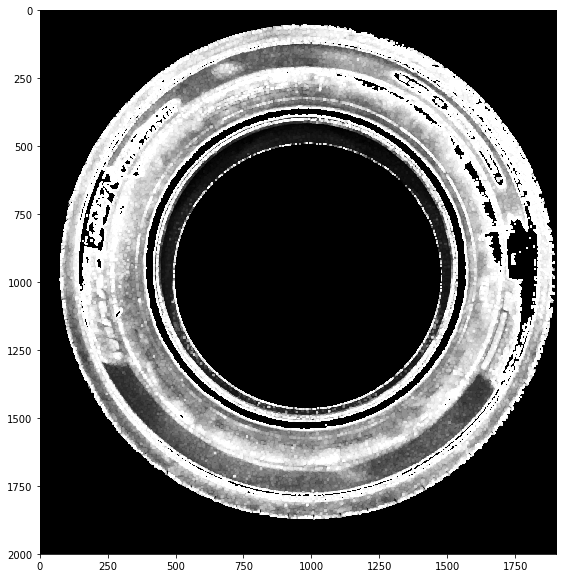

In [11]:
sure_bg = cv2.dilate(opening_watershed,kernel_watershed,3)
display_text_img(sure_bg)

In [12]:
# so convert the sure_fg to uint8
sure_fg = np.uint8(sure_fg)
# to find unknow region 
unknown = cv2.subtract(sure_bg,sure_fg)
# to indentify labelling marker 6 fg and seed for the watershed alogrithm find the segments
ret_mark, markers = cv2.connectedComponents(sure_fg)


In [13]:
HSV_img_1_eqhist_copy = HSV_img_1_eqhist.copy()
external_coutours = np.zeros(HSV_img_1_eqhist_copy.shape)
external_coutours.shape

(2001, 1900, 3)

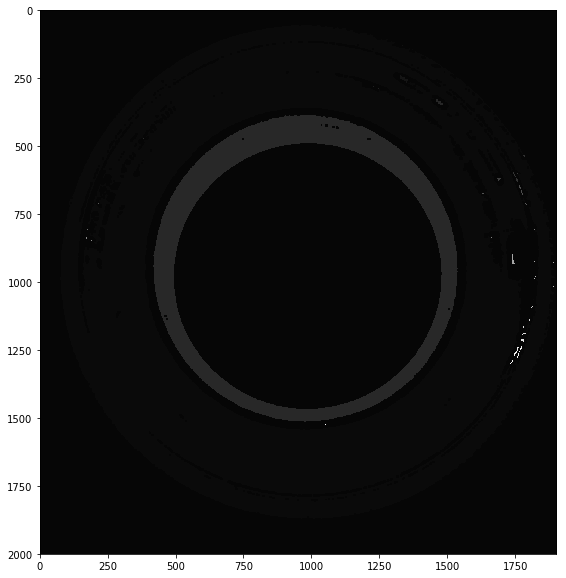

In [14]:
markers = markers + 1
markers[unknown==255] = 0
markers_watershed = cv2.watershed(HSV_img_1_eqhist_copy,markers)
display_text_img(markers_watershed)

In [15]:
image_sep_wat, sep_find_coutour_wat, hierarchy_sep_wat = cv2.findContours(markers_watershed.copy(), cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)



In [16]:
def get_contour_center(contour):
    M = cv2.moments(contour)
    cx=-1
    cy=-1
    if (M['m00']!=0):
        cx= int(M['m10']/M['m00'])
        cy= int(M['m01']/M['m00'])
    return cx, cy

In [17]:
for i in range(len(sep_find_coutour_wat)):
#external coutours
    if hierarchy_sep_wat[0][i][3] == -1:
        #cv2.drawContours(img_1_BGR_copy,sep_find_coutour_wat,i,255,10) 
        area = cv2.contourArea(sep_find_coutour_wat[i])
        perimeter= cv2.arcLength(sep_find_coutour_wat[i], True)
        ((x, y), radius) = cv2.minEnclosingCircle(sep_find_coutour_wat[i])
        if radius > 500 and radius <= 1000:
            cv2.drawContours(HSV_img_1_eqhist_copy,sep_find_coutour_wat,i,255,10) 
            cx, cy = get_contour_center(sep_find_coutour_wat[i])
            cv2.circle(img_1_BGR, (cx,cy),(int)(radius),(0,255,255),10)
            cv2.circle(external_coutours, (cx,cy),(int)(radius),(0,255,255),10)
            print ("radius: {}, Area: {}, Perimeter: {}".format(radius, area, perimeter))
            

radius: 565.4592895507812, Area: 983903.5, Perimeter: 3818.210569500923
radius: 595.7398071289062, Area: 1096682.5, Perimeter: 4071.7841634750366
radius: 911.3131103515625, Area: 2568633.0, Perimeter: 7324.201674818993


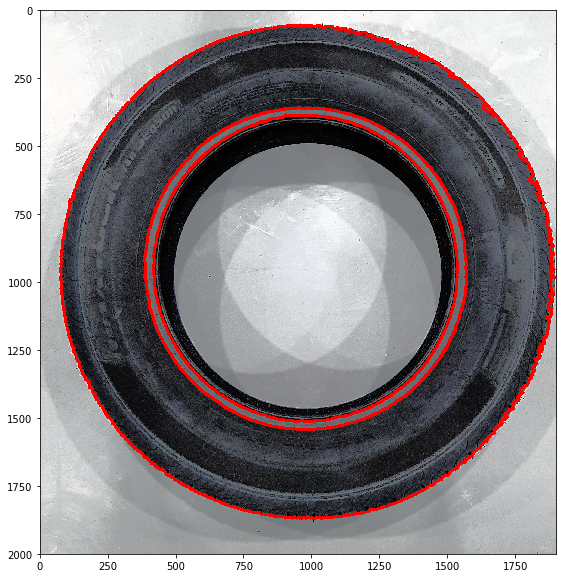

In [18]:
display_text_img(HSV_img_1_eqhist_copy)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


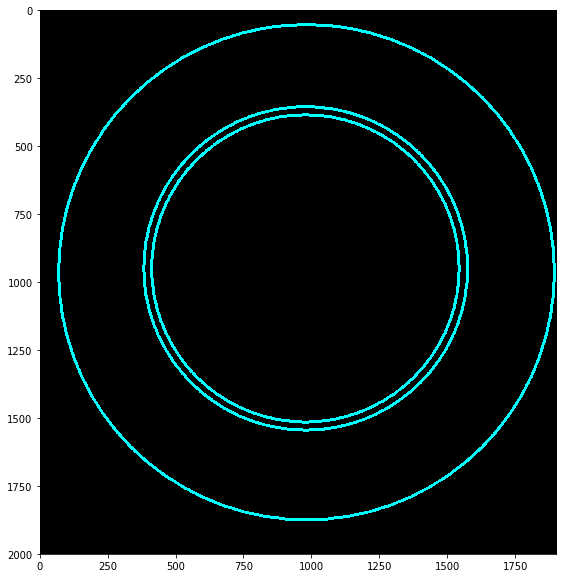

In [19]:
display_text_img(external_coutours)

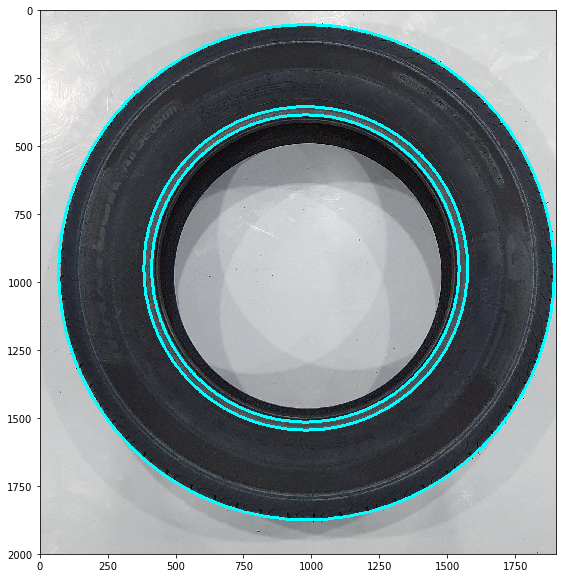

In [20]:
display_text_img(img_1_BGR)

In [22]:
pwd

'/Users/vigneshd/Applications/Tire_pictures/code_trail'

In [ ]:
plt.imsave('output_watershed_equalhist',HSV_img_1_eqhist_copy)


v = np.unique(hierarchy_sep_wat[0][:,3])
print(v)

for i in range(len(sep_find_coutour_wat)):
    HSV_img_1_eqhist_copy = HSV_img_1_eqhist.copy()
    if hierarchy_sep_wat[0][i][3] == -1:
        cv2.drawContours(HSV_img_1_eqhist_copy,sep_find_coutour_wat,i,255,10) 

display_text_img(HSV_img_1_eqhist_copy)

HSV_img_1_eqhist_copy = HSV_img_1_eqhist.copy()
for i in range(len(sep_find_coutour_wat)):
    if hierarchy_sep_wat[0][i][3] == 237:
        cv2.drawContours(HSV_img_1_eqhist_copy,sep_find_coutour_wat,i,255,10) 
display_text_img(HSV_img_1_eqhist_copy)

hierarchy_sep_wat[0][:,3]

HSV_img_1_eqhist_copy = HSV_img_1_eqhist.copy()
for i in range(len(sep_find_coutour_wat)):
    if hierarchy_sep_wat[0][i][3] == 394:
        area = cv2.contourArea(sep_find_coutour_wat[i])
        perimeter= cv2.arcLength(sep_find_coutour_wat[i], True)
        ((x, y), radius) = cv2.minEnclosingCircle(sep_find_coutour_wat[i])
        cv2.drawContours(HSV_img_1_eqhist_copy,sep_find_coutour_wat,i,255,10) 
        print ("radius: {}, Area: {}, Perimeter: {}".format(radius, area, perimeter))
display_text_img(HSV_img_1_eqhist_copy)

HSV_img_1_eqhist_copy = HSV_img_1_eqhist.copy()
for i in range(len(sep_find_coutour_wat)):
    if hierarchy_sep_wat[0][i][3] == -1:
        
        area = cv2.contourArea(sep_find_coutour_wat[i])
        perimeter= cv2.arcLength(sep_find_coutour_wat[i], True)
        ((x, y), radius) = cv2.minEnclosingCircle(sep_find_coutour_wat[i])
        if radius > 500 and radius <= 1000:
            cv2.drawContours(HSV_img_1_eqhist_copy,sep_find_coutour_wat,i,255,10) 
            print ("radius: {}, Area: {}, Perimeter: {}".format(radius, area, perimeter))
display_text_img(HSV_img_1_eqhist_copy)

greenLower = (0, 50, 20)
greenUpper = (5, 255, 255)
knownWidth = 0.3
knownRadius =  87.3273696899414
knownDistance= 1.7
#focalLength = 400 / math.tan(1.3962634 / 2)
focalLength = knownDistance * (knownRadius) / knownWidth 
Cx=400
Cy=400

c = max(cnts, key=cv2.contourArea) #find the maximum contour
((x, y), radius) = cv2.minEnclosingCircle(c) #compute the minimum enclosing circle of the ball
M = cv2.moments(c) #compute the center of that circle
center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))  

distance = (knownWidth * focalLength) / radius
#print("The distance is:", distance)
#print ("The horizontal length is:", HorSeg)
centerxM=(center[0] * distance) / focalLength;
centeryM=(center[1] * distance) / focalLength;
CxM= (Cx * distance) / focalLength; 
CyM= (Cy * distance) / focalLength;
DistFromCenter=math.sqrt( (centerxM-CxM)**2 + (centeryM-CyM)**2 )  
Hyp=math.sqrt((DistFromCenter)**2+distance**2)

angle=np.arcsin(DistFromCenter/Hyp);
if center[0] > Cx:
    angle=-angle

#Data=np.array([distance,angle])
value = data()
value.distance = Hyp
value.angle = angle
# finding the position of ball using the distance and angle.
postion_ball_x = math.cos(self.yaw)*(Hyp*math.cos(angle)+0.3+ self.x) - math.sin(self.yaw)*(Hyp*math.sin(angle) + self.y)
postion_ball_y = math.sin(self.yaw)*(Hyp*math.cos(angle)+0.3+ self.x) + math.cos(self.yaw)*(Hyp*math.sin(angle) + self.y) #math.thing takes radiants as input? YES!

In [ ]:
from scipy.spatial.distance import euclidean
from imutils import perspective
from imutils import contours
import numpy as np
import imutils
import cv2

# Function to show array of images (intermediate results)
def show_images(images):
	for i, img in enumerate(images):
		cv2.imshow("image_" + str(i), img)
	cv2.waitKey(0)
	cv2.destroyAllWindows()

img_path = "images/dummy_1.jpg"

# Read image and preprocess
image = cv2.imread(img_path)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (9, 9), 0)

edged = cv2.Canny(blur, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)

#show_images([blur, edged])

# Find contours
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# Sort contours from left to right as leftmost contour is reference object
(cnts, _) = contours.sort_contours(cnts)

# Remove contours which are not large enough
cnts = [x for x in cnts if cv2.contourArea(x) > 100]

#cv2.drawContours(image, cnts, -1, (0,255,0), 3)

#show_images([image, edged])
#print(len(cnts))

# Reference object dimensions
# Here for reference I have used a 2cm x 2cm square
ref_object = cnts[0]
box = cv2.minAreaRect(ref_object)
box = cv2.boxPoints(box)
box = np.array(box, dtype="int")
box = perspective.order_points(box)
(tl, tr, br, bl) = box
dist_in_pixel = euclidean(tl, tr)
dist_in_cm = 2
pixel_per_cm = dist_in_pixel/dist_in_cm
print(pixel_per_cm)
# Draw remaining contours
for cnt in cnts:
    box = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(box)
    box = np.array(box, dtype="int")
    box = perspective.order_points(box)
    (tl, tr, br, bl) = box
    cv2.drawContours(image, [box.astype("int")], -1, (0, 0, 255), 2)
    mid_pt_horizontal = (tl[0] + int(abs(tr[0] - tl[0])/2), tl[1] + int(abs(tr[1] - tl[1])/2))
    mid_pt_verticle = (tr[0] + int(abs(tr[0] - br[0])/2), tr[1] + int(abs(tr[1] - br[1])/2))
    wid = euclidean(tl, tr)/pixel_per_cm
    ht = euclidean(tr, br)/pixel_per_cm
    cv2.putText(image, "{:.1f}cm".format(wid), (int(mid_pt_horizontal[0] - 15), int(mid_pt_horizontal[1] - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)
    cv2.putText(image, "{:.1f}cm".format(ht), (int(mid_pt_verticle[0] + 10), int(mid_pt_verticle[1])), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)

show_images([image])